# Regressão Linear Simples

### Dataset Boston Houses

In [1]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

### Trabalhando com o Datase

In [3]:
# Convertendo o dataset em um dataframe com Pandas
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [4]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Calculando a média da variável de resposta
media = dataset['target'].mean()

In [6]:
media

22.532806324110698

In [7]:
# Calculando o SSE
squared_errors = pd.Series(media - dataset['target'])**2
SSE = np.sum(squared_errors)
print("Soma dos Quadrados dos Erros (SSE): %01.f" % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


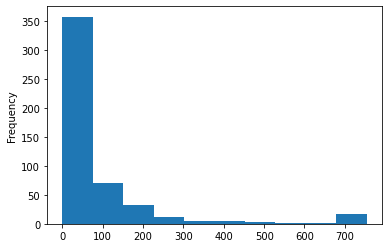

In [8]:
# Histograma dos erros
hist_plot = squared_errors.plot(kind = 'hist')

In [9]:
# Função para calcular o desvio padrão
def calcula_desvio_padrao(a, bias = 0):
    obs = float(len(a))
    return np.sqrt(np.sum((a - np.mean(a))**2) / (obs - min(bias, 1)))

In [10]:
# Imprimindo o desvio padrão via fórmula e via NumPy
print("Resultado da Função: %0.5f | Resultado do NumPy: %0.5f" % (calcula_desvio_padrao(dataset['RM']), np.std(dataset['RM'])))

Resultado da Função: 0.70192 | Resultado do NumPy: 0.70192


### Funções para calcular a variância e a correlação

In [11]:
def covariance(a, b, bias = 0):
    obs = float(len(a))
    return np.sum((a - np.mean(a)) * (b - np.mean(b))) / (obs - min(bias, 1))

In [12]:
def standardize(a):
    return (a - np.mean(a)) / np.std(a)

In [13]:
def correlation(a, b, bias = 0):
    return covariance(standardize(a), standardize(b), bias)

In [14]:
# Compara o resultado das nossas funções com a função pearson do SciPy
from scipy.stats.stats import pearsonr
print("Nossa estimativa de Correlação: %0.5f" % (correlation(dataset['RM'], dataset['target'])))
print("Correlação a partir da função pearson do SciPy: %0.5f" % pearsonr(dataset['RM'], dataset['target'])[0])

Nossa estimativa de Correlação: 0.69536
Correlação a partir da função pearson do SciPy: 0.69536


In [15]:
# Definindo o range dos valores de x e y
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

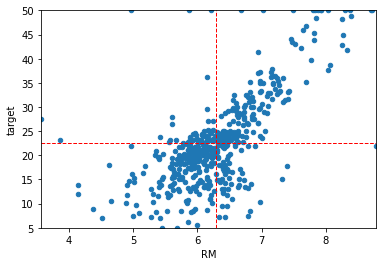

In [16]:
# Plot dos valores de x e y com a média
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)